## Exercise 3
* **Dataset:** [`Red wine`](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)
* **Model to use:** [`Decision tree`](https://scikit-learn.org/stable/modules/tree.html)
* **Model evaluation:** You can choose.

#### Classification and Regression Trees (CART) 
Decision Tree algorithm is known by its modern name CART which stands for Classification and  
 Regression Trees.  
  
Decision Tree algorithms that can be used for classification and regression modeling problems.

We will solve a classification problem. So, I will refer the algorithm also as **Decision Tree Classification** problem.

In [2]:
#Decision Tree Classification problem

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [3]:
df= pd.read_csv('./assets/winequality-red.csv')
wine = df

In [4]:
df.shape

(1599, 12)

In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Preprocessing Data for performing Machine learning algorithms

In [30]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [31]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [32]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [33]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

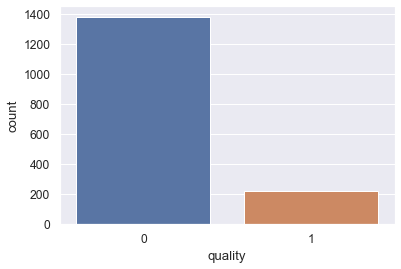

In [36]:
sns.countplot(x='quality', data=wine)

#### Declare feature vector and target variable

In [37]:
X = df.drop(['quality'], axis=1)
y = df['quality']

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#Train and Test splitting of data 
# note that y is stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

[Parameter "stratify"](https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn)

### Decision Tree Classifier with criterion gini index 

In [39]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [40]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [41]:
#Predict the Test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

In [42]:
#Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8781


#### Compare the train-set and test-set accuracy  
  
Now, I will compare the train-set and test-set accuracy to check for overfitting

In [43]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8741


Check for overfitting and underfitting

In [45]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8741
Test set score: 0.8781


Here, the training-set accuracy score is 0.8741 while the test-set accuracy to be 0.8781. These two values are quite comparable. So, there is no sign of overfitting.

### Visualize decision-trees

[Text(0.5, 0.875, 'X[10] <= 11.55\ngini = 0.235\nsamples = 1279\nvalue = [1105, 174]'),
 Text(0.25, 0.625, 'X[10] <= 10.45\ngini = 0.149\nsamples = 1070\nvalue = [983, 87]'),
 Text(0.125, 0.375, 'X[2] <= 0.655\ngini = 0.054\nsamples = 718\nvalue = [698, 20]'),
 Text(0.0625, 0.125, 'gini = 0.045\nsamples = 701\nvalue = [685, 16]'),
 Text(0.1875, 0.125, 'gini = 0.36\nsamples = 17\nvalue = [13, 4]'),
 Text(0.375, 0.375, 'X[1] <= 0.375\ngini = 0.308\nsamples = 352\nvalue = [285, 67]'),
 Text(0.3125, 0.125, 'gini = 0.489\nsamples = 94\nvalue = [54, 40]'),
 Text(0.4375, 0.125, 'gini = 0.187\nsamples = 258\nvalue = [231, 27]'),
 Text(0.75, 0.625, 'X[9] <= 0.615\ngini = 0.486\nsamples = 209\nvalue = [122, 87]'),
 Text(0.625, 0.375, 'X[8] <= 3.265\ngini = 0.281\nsamples = 71\nvalue = [59, 12]'),
 Text(0.5625, 0.125, 'gini = 0.483\nsamples = 22\nvalue = [13, 9]'),
 Text(0.6875, 0.125, 'gini = 0.115\nsamples = 49\nvalue = [46, 3]'),
 Text(0.875, 0.375, 'X[6] <= 15.5\ngini = 0.496\nsamples = 138\n

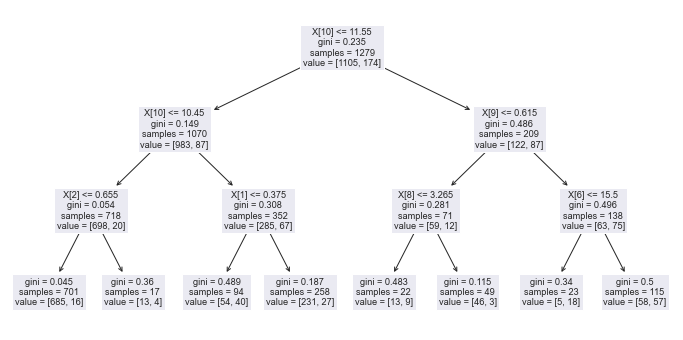

In [46]:
plt.figure(figsize=(12,6))

from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [47]:
'''
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 
'''

'\nimport graphviz \ndot_data = tree.export_graphviz(clf_gini, out_file=None, \n                              feature_names=X_train.columns,  \n                              class_names=y_train,  \n                              filled=True, rounded=True,  \n                              special_characters=True)\n\ngraph = graphviz.Source(dot_data) \n\ngraph \n'

### Confusion Matrix: criterion Gini

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gini)
print(cm)

[[276   1]
 [ 38   5]]


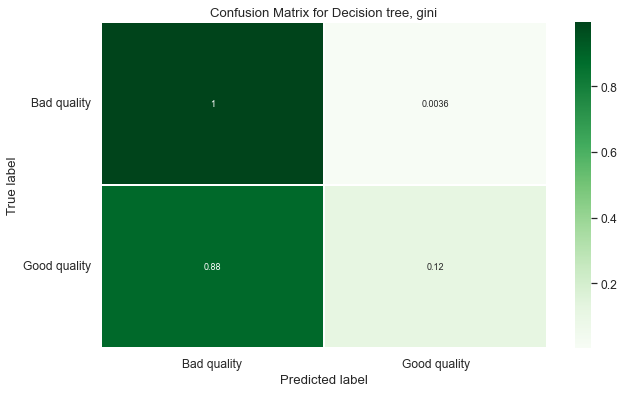

In [49]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_gini)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,6))
sns.set(font_scale=1.1)
sns.heatmap(matrix, annot=True, annot_kws={'size':9},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Bad quality', 'Good quality']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Decision tree, gini')
plt.show()

#### Classification Report, criterion gini

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       277
           1       0.83      0.12      0.20        43

    accuracy                           0.88       320
   macro avg       0.86      0.56      0.57       320
weighted avg       0.87      0.88      0.84       320



### Decision Tree Classifier with criterion entropy 

In [51]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [52]:
#Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(X_test)

In [53]:
#Check accuracy score with criterion entropy

from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8938


### Compare the train-set and test-set accuracy, criterion entropy
  
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [54]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

array([0, 0, 0, ..., 1, 0, 0])

In [55]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8749


Check for overfitting and underfitting

In [56]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8749
Test set score: 0.8938


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.8749 while the test-set accuracy to be 0.8938. These two values are quite comparable. So, there is no sign of overfitting.

Visualize decision-trees

[Text(0.5, 0.875, 'X[10] <= 10.45\nentropy = 0.574\nsamples = 1279\nvalue = [1105, 174]'),
 Text(0.25, 0.625, 'X[10] <= 9.85\nentropy = 0.184\nsamples = 718\nvalue = [698, 20]'),
 Text(0.125, 0.375, 'X[5] <= 12.5\nentropy = 0.067\nsamples = 500\nvalue = [496, 4]'),
 Text(0.0625, 0.125, 'entropy = 0.129\nsamples = 225\nvalue = [221, 4]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 275\nvalue = [275, 0]'),
 Text(0.375, 0.375, 'X[9] <= 0.635\nentropy = 0.378\nsamples = 218\nvalue = [202, 16]'),
 Text(0.3125, 0.125, 'entropy = 0.071\nsamples = 118\nvalue = [117, 1]'),
 Text(0.4375, 0.125, 'entropy = 0.61\nsamples = 100\nvalue = [85, 15]'),
 Text(0.75, 0.625, 'X[1] <= 0.425\nentropy = 0.848\nsamples = 561\nvalue = [407, 154]'),
 Text(0.625, 0.375, 'X[9] <= 0.735\nentropy = 0.984\nsamples = 247\nvalue = [142, 105]'),
 Text(0.5625, 0.125, 'entropy = 0.898\nsamples = 137\nvalue = [94, 43]'),
 Text(0.6875, 0.125, 'entropy = 0.988\nsamples = 110\nvalue = [48, 62]'),
 Text(0.875, 0.375, 'X[10

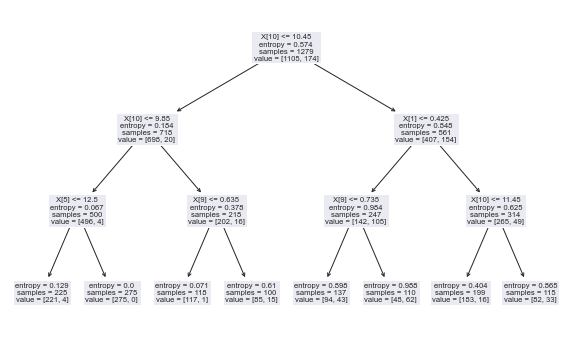

In [57]:
plt.figure(figsize=(10,6))

from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train))

### Confusion matrix

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print(cm)

[[271   6]
 [ 28  15]]


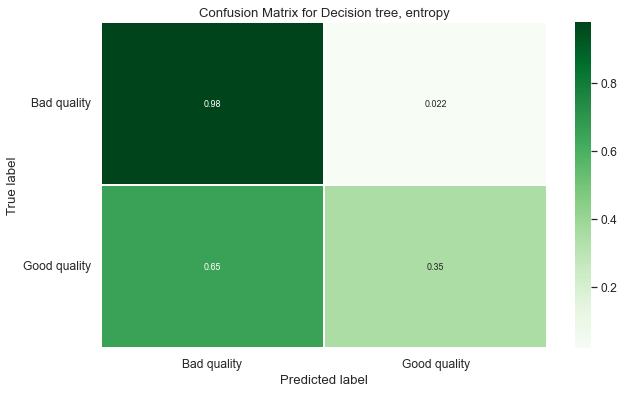

In [59]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_en)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,6))
sns.set(font_scale=1.1)
sns.heatmap(matrix, annot=True, annot_kws={'size':9},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Bad quality', 'Good quality']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Decision tree, entropy')
plt.show()

#### Classification Report, criterion entropy

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       277
           1       0.71      0.35      0.47        43

    accuracy                           0.89       320
   macro avg       0.81      0.66      0.70       320
weighted avg       0.88      0.89      0.88       320



In [65]:
#from sklearn.metrics import f1_score
#print("F1 Score: {}".format(f1_score(y_test,y_pred_en)))

F1 Score: 0.46875


#### Model evaluation: ROC curve (criterion: entropy)
1. ROC Curves(Receiver Operating Characteristic Curve):

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = clf_en.predict_proba(X_test)[:,1]
fprate, tprate, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)   #post_label =1

In [62]:
from sklearn.metrics import auc
roc_auc = auc(fprate, tprate)

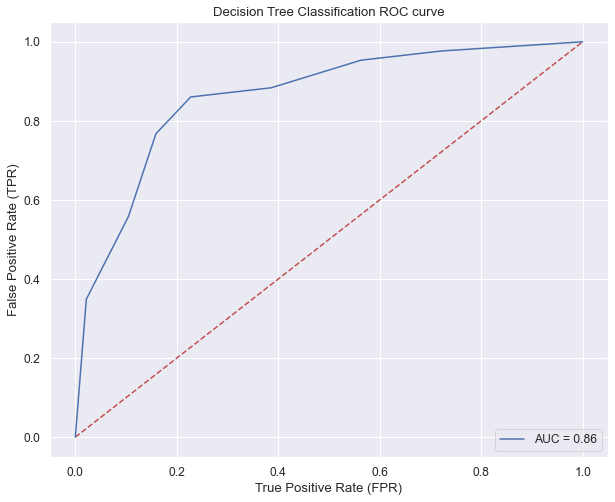

In [63]:
plt.figure(figsize = (10,8))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fprate, tprate, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlabel('True Positive Rate (FPR)')
plt.ylabel('False Positive Rate (TPR)')
plt.title('Decision Tree Classification ROC curve')
plt.show()

AUC Interpretation-  (check)

    At the lowest point, i.e. at (0, 0)- the threshold is set at 1.0. This means our model classifies all wine as bad quality???.
    At the highest point i.e. at (1, 1), the threshold is set at 0.0. This means our model classifies all wine as good quality.
    The rest of the curve is the values of FPR and TPR for the threshold values between 0 and 1. At some threshold value, we observe that for FPR close to 0, we are achieving a TPR of close to 1. This is when the model will predict the wine as good quality almost perfectly.
    
    The area with the curve and the axes as the boundaries is called the Area Under Curve(AUC). It is this area which is considered as a metric of a good model. With this metric ranging from 0 to 1, we should aim for a high value of AUC. Models with a high AUC are called as models with good skill.


Resources:  

[Decision-Tree Classifier](https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial/notebook)  

[Decision Tree Classification - Datacamp](https://www.datacamp.com/tutorial/decision-tree-classification-python)

[Documentation Decision Trees](https://scikit-learn.org/stable/modules/tree.html)